Image augmentation is a technique that is used to artificially expand the images data-set.

Image augmentation methods that are generally used are zoom, shear, rotation, preprocessing_function and so on. 

In this section, we utilize some of tensorflow.image API to augment our training images. For more details refer to: https://www.tensorflow.org/api_guides/python/image

For a more formal discussion, refer to: http://cs231n.stanford.edu/reports/2017/pdfs/300.pdf

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from data_util import dataset

In [2]:
# first load the cifar10 training data
cifar10 = dataset("./data/")
X_train, y_train, y_train_oh = cifar10.load_training_data()

Loading data: ./data/cifar-10-batches-py/data_batch_1
Loading data: ./data/cifar-10-batches-py/data_batch_2
Loading data: ./data/cifar-10-batches-py/data_batch_3
Loading data: ./data/cifar-10-batches-py/data_batch_4
Loading data: ./data/cifar-10-batches-py/data_batch_5


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000,)

In [5]:
y_train_oh.shape

(50000, 10)

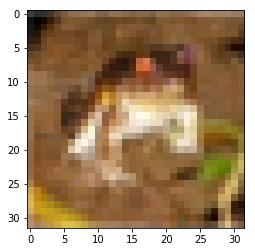

In [6]:
# view the first image
plt.imshow(X_train[0])

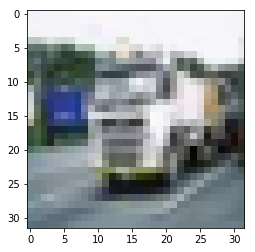

In [7]:
# another image
plt.imshow(X_train[1000])

### Flipping

In [8]:
# flip up and down (not very useful for this task)
with tf.Session() as sess:
    new_img = sess.run(tf.image.flip_up_down(X_train[0]))

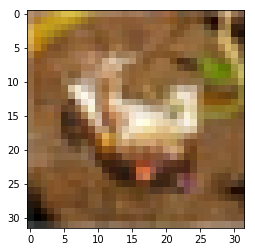

In [9]:
plt.imshow(new_img)

In [12]:
# flip left and right
with tf.Session() as sess:
    new_img_0 = sess.run(tf.image.flip_left_right(X_train[0]))
    new_img_1 = sess.run(tf.image.flip_left_right(X_train[1000]))

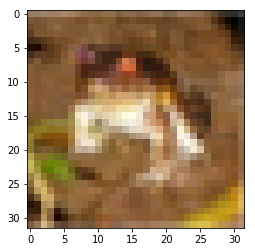

In [13]:
plt.imshow(new_img_0)

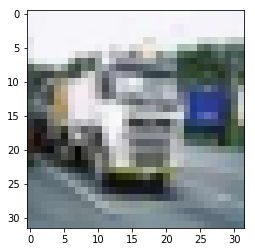

In [14]:
plt.imshow(new_img_1)

### Adjust hue

In [16]:
# randomly adjust hue
with tf.Session() as sess:
    new_img_0 = sess.run(tf.image.random_hue(X_train[0], max_delta=0.1, seed=0))
    new_img_1 = sess.run(tf.image.random_hue(X_train[1000], max_delta=0.1, seed=0))

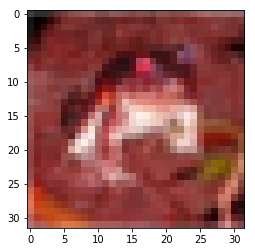

In [17]:
plt.imshow(new_img_0)

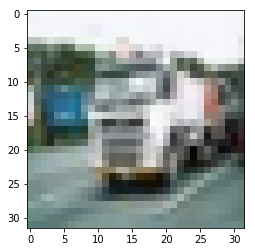

In [18]:
plt.imshow(new_img_1)

### Resize image

In [19]:
# resize images to 2x
with tf.Session() as sess:
    new_img_0 = sess.run(tf.image.resize_images(X_train[0], size=[64,64]))
    new_img_1 = sess.run(tf.image.resize_images(X_train[1000], size=[64,64]))

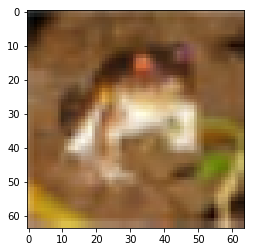

In [20]:
plt.imshow(new_img_0)

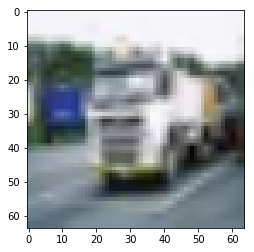

In [21]:
plt.imshow(new_img_1)

### Apply augmentation to all training samples

In [22]:
# here we apply flipping left and right to all our training data so we get an increase of 100% in training size
X_train_flip = tf.map_fn(tf.image.flip_left_right, X_train)
with tf.Session() as sess:
    X_train_flip = sess.run(X_train_flip)

In [23]:
X_train_flip.shape

(50000, 32, 32, 3)

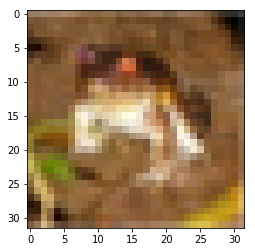

In [24]:
plt.imshow(X_train_flip[0])

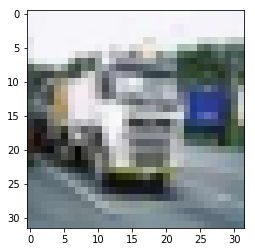

In [25]:
plt.imshow(X_train_flip[1000])

In [26]:
# concatenate new images to training data, augment existing no of images by 2x
X_train = np.vstack([X_train, X_train_flip])

In [27]:
X_train.shape

(100000, 32, 32, 3)